In [36]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/pramdf042/PPW/main/Data%20Berita%20Detik.csv')

In [38]:
def cleaning(text):
    # Remove non-alphabetic characters (letters, spaces, and punctuation other than periods)
    text = re.sub(r'[^a-zA-Z\s.,]', '', text).strip()
    return text

df['Cleaning'] = df['Artikel'].apply(cleaning)
df['Cleaning']

0     Peran dan kebiasaan orang tua akan sangat memp...
1     Pendaftaran jenjang Magister atau S di Univers...
2     Ketika meresensi buku atau mengulas buku terda...
3     Craig Mokhiber mengundurkan diri dari jabatann...
4     Sumber Daya Manusia SDM yang unggul menjadi sa...
5     Populasi kepiting salju di Pantai Alaska diket...
6     SMA Unggulan CT ARSA Foundation Sukoharjo, Jaw...
7     Memasuki masa ujian, siswa dan mahasiswa bisa ...
8     Semua makhluk memerlukan respirasi untuk menda...
9     Orang meninggal dunia akibat bencana gagal pan...
10    Seleksi Kompetensi Dasar SKD akan diikuti oleh...
11    Tahukah detikers, salah satu bentuk perpindaha...
12    Kemendikbudristek menemukan penyaluran dana pa...
13    Ilmu geografi adalah ilmu yang mempelajari ten...
14    Istilah lompat sudah tidak asing lagi kita tem...
15    Kampus Merdeka memperpanjang mendaftaran kompe...
16    Pelamar CPNS yang dinyatakan lolos seleksi adm...
17    Apakah detikers pernah mendengar klasifika

In [39]:
from nltk.tokenize import sent_tokenize
# Fungsi untuk mengekstrak artikel menjadi kalimat
def extract_sentences(article):
    sentences = sent_tokenize(article)
    return sentences

# Menerapkan fungsi extract_sentences ke setiap baris dalam kolom 'artikel'
df['Kalimat'] = df['Cleaning'].apply(extract_sentences)
df['Kalimat']

0     [Peran dan kebiasaan orang tua akan sangat mem...
1     [Pendaftaran jenjang Magister atau S di Univer...
2     [Ketika meresensi buku atau mengulas buku terd...
3     [Craig Mokhiber mengundurkan diri dari jabatan...
4     [Sumber Daya Manusia SDM yang unggul menjadi s...
5     [Populasi kepiting salju di Pantai Alaska dike...
6     [SMA Unggulan CT ARSA Foundation Sukoharjo, Ja...
7     [Memasuki masa ujian, siswa dan mahasiswa bisa...
8     [Semua makhluk memerlukan respirasi untuk mend...
9     [Orang meninggal dunia akibat bencana gagal pa...
10    [Seleksi Kompetensi Dasar SKD akan diikuti ole...
11    [Tahukah detikers, salah satu bentuk perpindah...
12    [Kemendikbudristek menemukan penyaluran dana p...
13    [Ilmu geografi adalah ilmu yang mempelajari te...
14    [Istilah lompat sudah tidak asing lagi kita te...
15    [Kampus Merdeka memperpanjang mendaftaran komp...
16    [Pelamar CPNS yang dinyatakan lolos seleksi ad...
17    [Apakah detikers pernah mendengar klasifik

In [40]:
df['Kalimat'][0]

['Peran dan kebiasaan orang tua akan sangat mempengaruhi perkembangan anak.',
 'Setiap pola asuh yang kita ajarkan harus diperhatikan dengan penuh hatihati.',
 'Dalam hal ini, ternyata ada beberapa kebiasaan orang tua yang mungkin tidak disadari, namun bisa berdampak buruk pada potensi anak hingga merusak perkembangannya.',
 'Lebih lanjut, simak penjelasan lengkapnya di bawah ini.',
 'SCROLL TO CONTINUE WITH CONTENT Orang tua haruslah mengajarkan sesuatu yang baik, karena setiap perbuatan dan perkataan mereka berperan dalam proses belajar dan perkembangan anak.',
 'Demikian juga yang disampaikan oleh pakar pendidikan anak usia dini dari Universitas Negeri Surabaya UNESA, Prof Dr Rachma Hasibuan, bahwa setiap ucapan orang tua akan berdampak pada psikologis dan perkembangan karakter anak.',
 'Dikutip dari paparan Prof Dr Rachma dari laman UNESA, berikut adalah beberapa kebiasaan orang tua yang bisa merusak perkembangan anak Menakutnakuti anak mungkin sering kita dengar dalam kehidupan se

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['Dokumen'] = df['Kalimat'].apply(lambda sentences: ' '.join(sentences))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Dokumen'])
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,aac,abad,abdul,abdullah,abolisib,abolisic,abomasum,abrib,absorpsi,ac,...,yudikatif,yudisial,yudisialc,yuk,yunani,yupa,yurisprudensie,zambiae,zat,zatzat
0,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
1,0.04602,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.04602,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.073998,0.00000,0.00000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.022179,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.015989,0.000000,0.00000,0.00000,0.000000,0.042034,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000


In [42]:
# # Menggabungkan DataFrame asli dengan DataFrame TF-IDF
# result_df = pd.concat([df[['Judul']], tfidf_df], axis=1)
# result_df

In [43]:
# Menyimpan hasilnya ke dalam file CSV baru
output_file_path = 'berita_dalam_kalimat1.csv'
df.to_csv(output_file_path, index=False)

In [44]:
# import library untuk menghitung cosinus similarity

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
len_kalimat = df['Dokumen'].shape[0]
temp = []
node = 0
for i in range(len_kalimat):
  for j in range(len_kalimat - i):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([df['Dokumen'][i], df['Dokumen'][i+j]])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity_score = cosine_sim[0][0]
    temp.append(["node-{} {}&{}".format(node, i, i+j), similarity_score])
    node +=1

In [46]:
temp

[['node-0 0&0', 1.0],
 ['node-1 0&1', 0.13099017463160711],
 ['node-2 0&2', 0.1570085587312921],
 ['node-3 0&3', 0.23854583708013494],
 ['node-4 0&4', 0.17862571098969987],
 ['node-5 0&5', 0.22413090871520894],
 ['node-6 0&6', 0.09842773520070904],
 ['node-7 0&7', 0.23382082098094242],
 ['node-8 0&8', 0.18679818855748026],
 ['node-9 0&9', 0.24313052676709773],
 ['node-10 0&10', 0.26836866749544896],
 ['node-11 0&11', 0.13581903974894674],
 ['node-12 0&12', 0.1418207400706338],
 ['node-13 0&13', 0.15932013867875006],
 ['node-14 0&14', 0.19753946374420403],
 ['node-15 0&15', 0.05175533319914437],
 ['node-16 0&16', 0.27719296802242416],
 ['node-17 0&17', 0.18517164619780765],
 ['node-18 0&18', 0.20862987801368116],
 ['node-19 1&1', 0.9999999999999998],
 ['node-20 1&2', 0.13231654840857834],
 ['node-21 1&3', 0.16659832967742422],
 ['node-22 1&4', 0.22892834453687916],
 ['node-23 1&5', 0.15453580374093798],
 ['node-24 1&6', 0.11462861662797663],
 ['node-25 1&7', 0.18700262159000722],
 ['nod

In [47]:
sentences = [df['Dokumen'][0], df['Dokumen'][1], df['Dokumen'][2],df['Dokumen'][3],df['Dokumen'][4],df['Dokumen'][5]]
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences).toarray()
G = nx.Graph()

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity_score = cosine_similarity([tfidf_matrix[i]], [tfidf_matrix[j]])[0][0]
        print(similarity_score)
        if similarity_score > 0.02:  # Sesuaikan threshold sesuai kebutuhan
            G.add_edge(sentences[i], sentences[j], weight=similarity_score)

0.0709972635467072
0.09737570969661286
0.14805026177825742
0.10387815609374332
0.13974603767611013
0.08072176919169803
0.1071441463102381
0.16625151888805356
0.0961967245246862
0.14162459295847643
0.0965932573714113
0.10667119594505396
0.14207448346194024
0.17994044898105477
0.13058479650098428


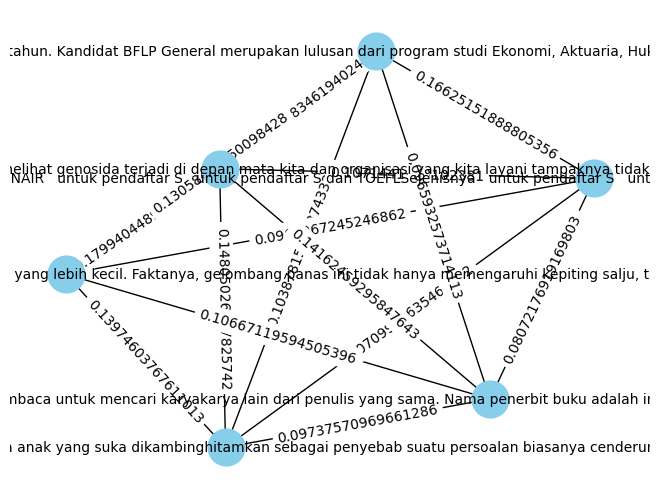

In [48]:
# Menggambar grafik
pos = nx.spring_layout(G)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [49]:
closeness_centrality = nx.closeness_centrality(G, distance='weight')

sorted_closeness_centrality = {node: value for node, value in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

# Membuat DataFrame dari hasil yang diurutkan
df = pd.DataFrame(list(sorted_closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Menampilkan DataFrame
df

,Node,Closeness Centrality
0,Pendaftaran jenjang Magister atau S di Univers...,9.591196
1,Ketika meresensi buku atau mengulas buku terda...,9.560476
2,Peran dan kebiasaan orang tua akan sangat memp...,8.927815
3,Sumber Daya Manusia SDM yang unggul menjadi sa...,7.820049
4,Populasi kepiting salju di Pantai Alaska diket...,7.655336
5,Craig Mokhiber mengundurkan diri dari jabatann...,6.955709


In [50]:
closeness_centrality

{'Peran dan kebiasaan orang tua akan sangat mempengaruhi perkembangan anak. Setiap pola asuh yang kita ajarkan harus diperhatikan dengan penuh hatihati. Dalam hal ini, ternyata ada beberapa kebiasaan orang tua yang mungkin tidak disadari, namun bisa berdampak buruk pada potensi anak hingga merusak perkembangannya. Lebih lanjut, simak penjelasan lengkapnya di bawah ini. SCROLL TO CONTINUE WITH CONTENT Orang tua haruslah mengajarkan sesuatu yang baik, karena setiap perbuatan dan perkataan mereka berperan dalam proses belajar dan perkembangan anak. Demikian juga yang disampaikan oleh pakar pendidikan anak usia dini dari Universitas Negeri Surabaya UNESA, Prof Dr Rachma Hasibuan, bahwa setiap ucapan orang tua akan berdampak pada psikologis dan perkembangan karakter anak. Dikutip dari paparan Prof Dr Rachma dari laman UNESA, berikut adalah beberapa kebiasaan orang tua yang bisa merusak perkembangan anak Menakutnakuti anak mungkin sering kita dengar dalam kehidupan sehari hari. Namun, hal te